<a href="https://colab.research.google.com/github/saifulrijal-ds/image-classification-with-DL/blob/main/Pretrained_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import os

## Constants

In [2]:
directory = ('/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images')

# filenames = []
files_dict = {}
for filename in os.listdir(directory):
  if filename.endswith('.jpg'):
    # print(filename.split())
    path = os.path.join(directory, filename)
    files_dict["file_{}".format(filename.split()[0])] = path
    # filenames.append(path)
  else:
    continue

# filenames
files_dict

{'file_01': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/01 Umbrella.jpg',
 'file_02': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/02 Couple.jpg',
 'file_03': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/03 Ocean.jpg',
 'file_04': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/04 Horse.jpg',
 'file_05': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/05 City.jpg',
 'file_06': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/06 Feet.jpg',
 'file_07': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classification_Images/07 Stairs.jpg',
 'file_08': '/content/drive/My Drive/Image Classification with Deep Learning/data/TF_Keras_Classifica

In [3]:
FILE_1 = files_dict['file_01']
FILE_2 = files_dict['file_02']
FILE_3 = files_dict['file_03']

## Preprocessing Images

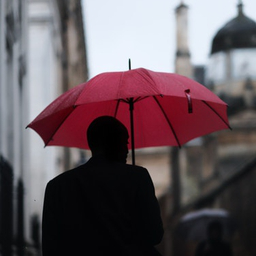

In [4]:
pic = load_img(FILE_1)
display(pic)

In [5]:
  pic_array = img_to_array(pic)
  pic_array.shape

(256, 256, 3)

Hasil pic_array.shape yaitu (256, 256, 3) dapat diinterpretasikan 256 baris, 256 kolom (resolusi gambar setelah dikompres oleh mesin), dan 3 'channel' atau mewakili 3 warna RGB.